In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers





7/7 [==============================] - 0s 4ms/step
ANN Test Accuracy: 0.7700
Decision Tree Test Accuracy: 0.6300


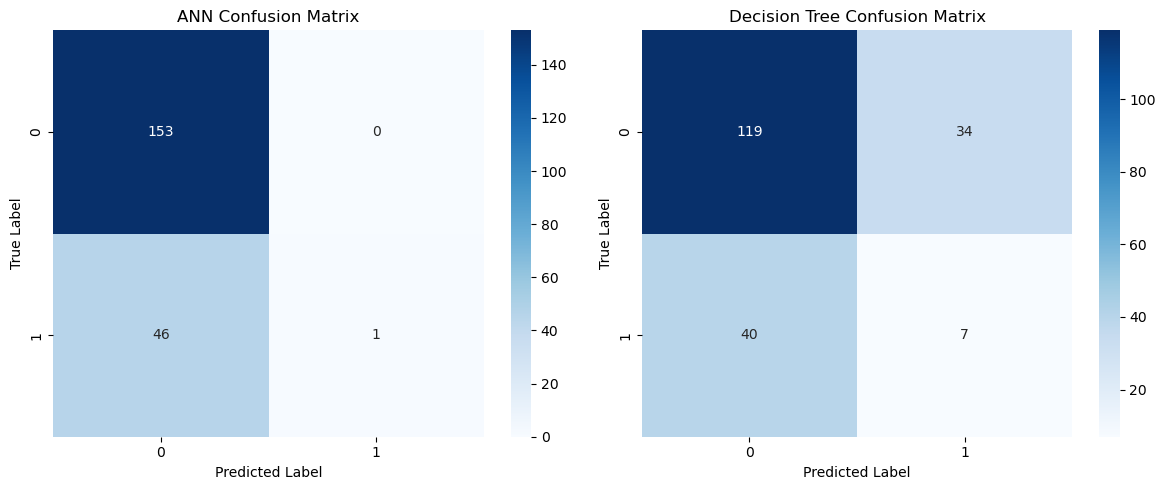

In [2]:
# Load the synthetic dataset
dataset = pd.read_csv('congestion_dataset.csv')

# Split the dataset into features (X) and labels (y)
X = dataset.drop('Congestion', axis=1)
y = dataset['Congestion']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data for the ANN model
scaler = StandardScaler()
X_train_ann = scaler.fit_transform(X_train)
X_test_ann = scaler.transform(X_test)

# Build and train the ANN model
ann_model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_ann.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann_model.fit(X_train_ann, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the ANN model on the test set
ann_predictions = (ann_model.predict(X_test_ann) > 0.5).astype('int32')

# Build and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Evaluate the Decision Tree model on the test set
dt_predictions = dt_model.predict(X_test)

# Compare the performance of both models
ann_accuracy = accuracy_score(y_test, ann_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)

print(f'ANN Test Accuracy: {ann_accuracy:.4f}')
print(f'Decision Tree Test Accuracy: {dt_accuracy:.4f}')

# Plot a confusion matrix for both models
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Confusion matrix for ANN model
sns.heatmap(confusion_matrix(y_test, ann_predictions), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('ANN Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Confusion matrix for Decision Tree model
sns.heatmap(confusion_matrix(y_test, dt_predictions), annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Decision Tree Confusion Matrix')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()
